Loading model from models/rnn_lstm_w_SNR_5_2_1.keras


2024-10-28 22:32:44.607138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-28 22:32:44.608201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-10-28 22:32:44.609235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1375/1375 [==============================] - 6s 4ms/step
Confusion matrix saved to stats/confusion_matrix/rnn_lstm_w_SNR_5_2_1.png


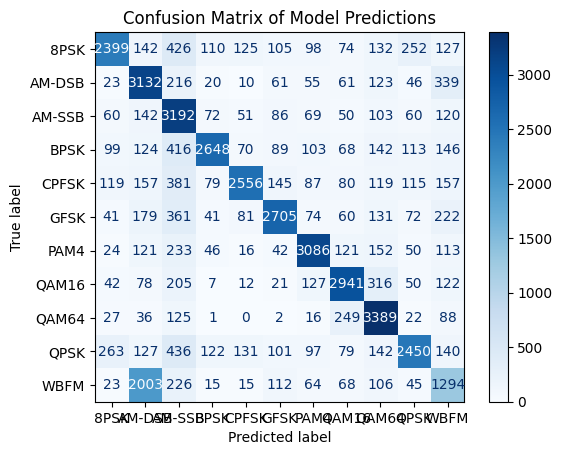

In [4]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths
data_path = os.path.join("..", "RML2016.10a_dict.pkl")  # Adjust as necessary
model_path = os.path.join("models", "rnn_lstm_w_SNR_5_2_1.keras")
stats_path = os.path.join("stats", "confusion_matrix", "rnn_lstm_w_SNR_5_2_1.png")

# Load Data
with open(data_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Prepare Data
X, y = [], []
for (mod_type, snr), signals in data.items():
    for signal in signals:
        iq_signal = np.vstack([signal[0], signal[1]]).T
        snr_signal = np.full((128, 1), snr)
        combined_signal = np.hstack([iq_signal, snr_signal])
        X.append(combined_signal)
        y.append(mod_type)

X = np.array(X)
y = np.array(y)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2])

# Load Model
if os.path.exists(model_path):
    print(f"Loading model from {model_path}")
    model = load_model(model_path)
else:
    raise FileNotFoundError(f"Model file not found at {model_path}")


# Generate Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the confusion matrix as a PNG file
plt.title("Confusion Matrix of Model Predictions")
plt.savefig(stats_path, format="png")
print(f"Confusion matrix saved to {stats_path}")

plt.show()

